In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iriscsv/Iris.csv


In [2]:
df= pd.read_csv('/kaggle/input/iriscsv/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df= df.drop('Id', axis= 1)

In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
grouped_df= df.groupby('Species')
grouped_df.head()    

    

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [8]:
Setosa= grouped_df.get_group('Iris-setosa')
Setosa.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
Versicolor= grouped_df.get_group('Iris-versicolor')
Versicolor.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [10]:
Virginica= grouped_df.get_group('Iris-virginica')
Virginica.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


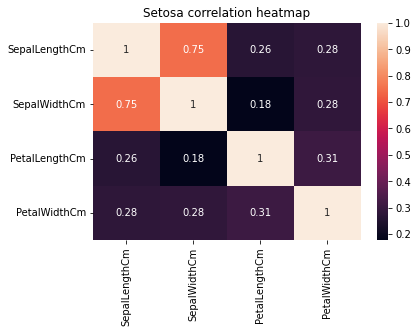

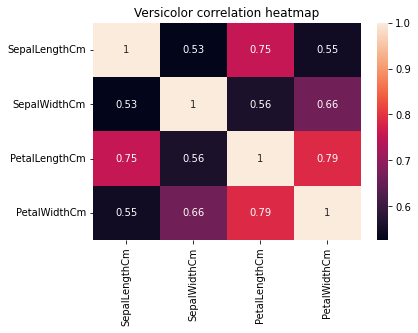

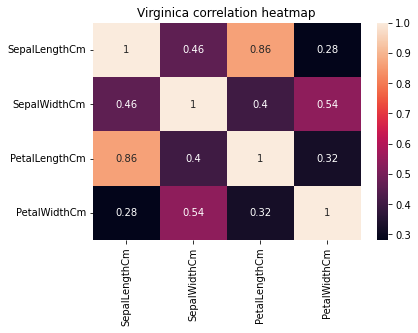

In [11]:
groups= {'Setosa': Setosa, 'Versicolor': Versicolor, 'Virginica': Virginica}

for key, val in groups.items():
    correlation=val.corr()
    sns.heatmap(correlation,annot=True)
    plt.title(key + ' correlation heatmap')
    plt.show()


Text(0.5, 1.0, 'Scatter Plot')

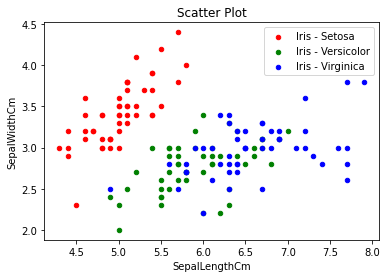

In [12]:
ax = df[df.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='Iris - Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='Iris - Versicolor', ax=ax)
df[df.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='Iris - Virginica', ax=ax)
ax.set_title("Scatter Plot")

Text(0.5, 1.0, 'Scatter Plot')

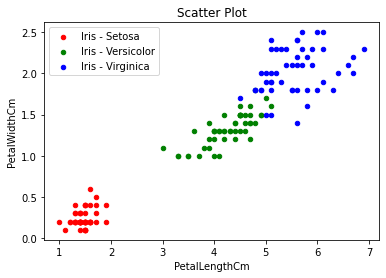

In [13]:
ax = df[df.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                    color='red', label='Iris - Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='green', label='Iris - Versicolor', ax=ax)
df[df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='blue', label='Iris - Virginica', ax=ax)
ax.set_title("Scatter Plot")

Inference: 

It seems that the Petal dimensions will be more decisive in clustering the data. 

In [14]:
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
df.shape

(150, 5)

In [16]:
from sklearn.model_selection import train_test_split



In [17]:
X= df.drop('Species', axis= 1)
y= df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(107, 4)
(43, 4)
(107,)
(43,)


In [18]:
kmeans= KMeans(n_clusters= 3, random_state= 4)
kmeans.fit(X_train, y_train)



KMeans(n_clusters=3, random_state=4)

In [19]:
#training prediction
train_labels= kmeans.predict(X_train)
train_labels

array([2, 1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0,
       2, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2,
       1, 0, 0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 2, 0, 1, 0, 0,
       2, 1, 2, 0, 0, 1, 0, 1, 0, 2, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 0],
      dtype=int32)

In [20]:
accuracy_score(y_train, train_labels)


0.8878504672897196

In [21]:
#validation set prediction
y_pred= kmeans.predict(X_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 2, 0, 1],
      dtype=int32)

In [22]:
accuracy_score(y_test, y_pred)

0.9069767441860465